In [1]:
import numpy as np
import random

In [7]:
random.seed(42)
N = 1000 # Cantidad de simulaciones

no_change = 0 # Cantidad de veces que me llevo el auto sin cambiar de puerta
change = 0 # Cantidad de veces que me llevo el auto cambiando de puerta
rand_sel = 0 # Cantidad de veces que me llevo el auto eligiendo al azar entre las dos puertas restantes


# Hits acumulados
change_acum = [] 
no_change_acum = []
rand_sel_acum = []

for i in range(N):
  # Ubicación del auto (una de las 3 puertas al azar)
  car_pos = random.randint(0,2)
  # Selecciono una puerta al azar
  selected_door = random.randint(0,2) 
  doors = [0,1,2] # Lista con las 3 opciones de puertas
  doors.remove(selected_door) # Me quedo con las dos puertas que no elegí
  if selected_door == car_pos:
    # No cambio de puerta y era la puerta donde estaba el auto, sumo uno a la variable correspondiente
    no_change += 1
    # Abro cualquiera de las dos puertas restantes. Elijo una de los dos restantes al azar
    puertas_restantes = doors[random.randint(0,1)]
  else:
    # Remuevo la puerta que tiene el auto. No la puedo abrir
    doors.remove(car_pos)
    # Solo me me queda una puerta para abrir
    puertas_restantes = doors[0]
  
  selected_door_change = [0, 1, 2] # Inicialmente contiene las 3 puertas pero me tengo que quedar con la puerta que elijo si cambio
  # Remuevo la que abrio y me quedo con las dos posibles
  selected_door_change.remove(puertas_restantes)
  
  if selected_door_change[np.random.randint(2)] == car_pos:
    # Elijo al azar entre las dos puertas restantes y coincide con el auto. Sumo uno a la variable correspondiente
    rand_sel += 1

  # Remuevo la que elegi primero ya que ahora cambié (cambio de puerta)
  selected_door_change.remove(selected_door)

  if selected_door_change[0] == car_pos:
    # Si coinciden la que elegí cambiando con la del auto. Sumo uno a la variable correspondiente
    change += 1
  change_acum.append(change)
  no_change_acum.append(no_change)
  rand_sel_acum.append(rand_sel)

In [8]:
no_change, change, rand_sel

(322, 678, 525)

In [9]:
from matplotlib import pyplot as plt

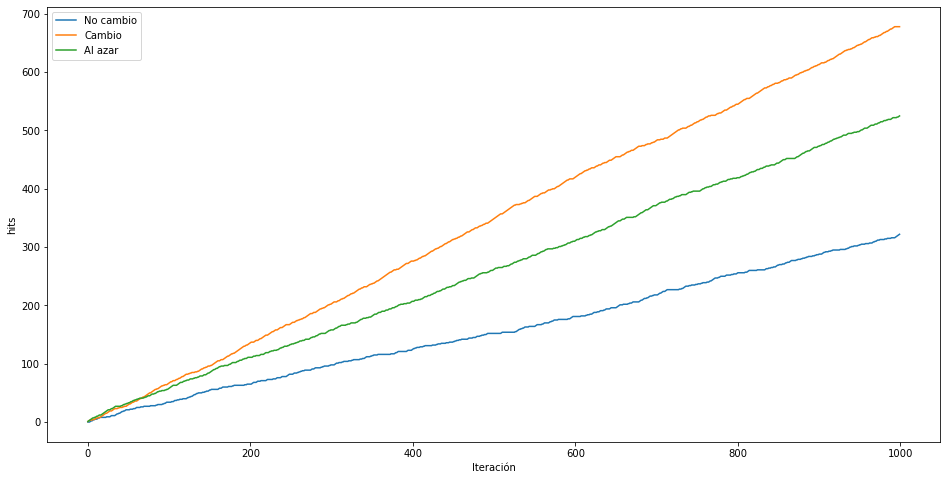

In [10]:
plt.figure(figsize=(16,8))
plt.plot(no_change_acum, label='No cambio')
plt.plot(change_acum, label='Cambio')
plt.plot(rand_sel_acum, label='Al azar')
plt.xlabel('Iteración')
plt.ylabel('hits')
plt.legend()
plt.show()